# portfolio optimisation theory:

Modern Portfolio Theory originated from Harry Markowitz's 1952 doctoral thesis introduced the Markowitz model. This model presumes that investors aim to maximize the expected return of a portfolio for a given level of risk.

Portfolios that maximize the expected return for a specified risk level, are considered efficient portfolios.

Portfolio optimization involves choosing the best portfolio from a range of potential portfolios based on certain goals. These goals often include maximizing expected returns and minimizing elements like financial risk, thus creating a multi-objective optimization challenge.

literary the problem is as follows: Consider an investor that seeks a best allocation of wealth 
among a basket of risky assets, called portfolio. The best
can be defined as an allocation such that the risk incurre 
is minimum for that level of expected return or te 
expected return is maximum for that level of . (reference: https://linux.ime.usp.br/~cef/mac499-01/monografias/fdias-rec/QP.pdf)risk

The portfolio optimisation problem can be constructed as a quadratic programming problem, we want to optimise x so that we can maximise the risk-adjusted return of the portfolio: max $\frac{x' r - R_f}{\sqrt{x' \text{Cov} x}}$
the variables are as follows: <br>

x is the portfolio weights <br>

r is the expected asset returns <br>

x'r is the portfolio expected return for n assets <br>

Rf is the risk free rate of return <br>

 $ \sqrt{x' \text{Cov} x} $  is the covariance matrix of the asset returns <br>

 ${x' \text{Cov} x}$ is the portfolio risk <br>

 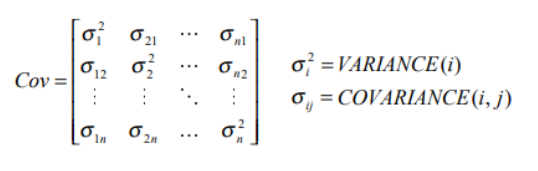


The covariance matrix illustrated just above is a square matrix that quantifies the relationship between the returns of multiple assets in a portfolio. Each sigma represents the covariance between the return of two assets, diagonal elements represent the variance of each individual assets return - in other words variance is a measure of individual asset volatility. the non-diagonal represent covariance between the returns of asset i and j - a measure of how two different assets move in relation to eachother. Low or negative covariance helps reduce risk. A positive covariance indicates that the returns of two assets tend to move in the same direction, while a negative covariance indicates they move in opposite directions. A covariance of zero suggests that there is no linear relationship between the returns of the two assets.

portfolio volatility = $ \sqrt{w_1^2 \cdot \sigma_1^2 + w_2^2 \cdot \sigma_2^2 + 2 \cdot w_1 \cdot w_2 \cdot \text{Cov}_{1,2}} $ . For the full portfolio which we are calculating for, volatility also includes the covariance, relationships between assets too.


In the context of Modern Portfolio Theory (MPT), the covariance matrix plays a crucial role in determining the risk and diversification benefits of a portfolio. MPT emphasizes the importance of diversification in reducing portfolio risk. By including assets with low or negative covariances in a portfolio, investors can effectively hedge against the risk of individual assets and achieve better risk-adjusted returns. The covariance matrix allows investors to quantify the relationships between different assets and construct portfolios that maximize diversification benefits.

The final concept explained in this section is the sharpe ratio - it is a measure risk adjusted return. We are optimising x - the weights of each asset, to maximise the sharpe ratio. In other words the portfolio with the highest sharpe ratio is the most efficient portfolio.



## downloading data for bloomberg
this assignment requires us to optimise a portfolio consisting 0f the following assets/securities: amazon, tesla, goldman sachs, DAX and BNDX ETF. Bloomberg provides all the security data needed and thanks to excel functions we can store Bloomerg data on securities and create a csv document that our code can read and thus use later on. This section is dedicated to explaining the process

step 0) Have access to a bloomberg terminal with excel acess, this will allow us to have the bloomberg tab on excel and extract the data through excel tools.

step 0.5) how to get access to the bloomberg tab: This guide serves the exact method needed to get access to the bloomberg tab on excel after logging into the terminal and opening bloomberg 
https://www.bodleian.ox.ac.uk/sites/default/files/bodreader/documents/media/bloomberg-excel-add-in-guide.pdf

step 1) <br>  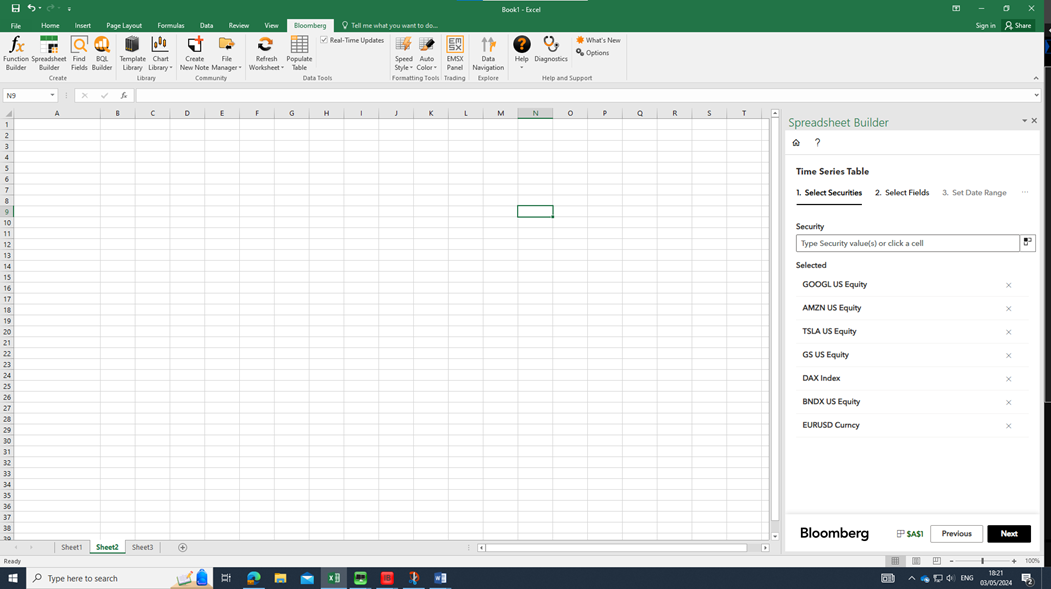 <br>

we are using the spreadsheet builder tool - second to the left of the bloomberg tab. This is a 3 step process which will allow us to select the data of securities we want, select the type of data we want and finally over which time period do we want the data from.

aside from the 6 securities we also choose the EUR/USD currency as our portfolio is in dollars but the DAX index is in euros and needs to be converted.

step 2) <br>  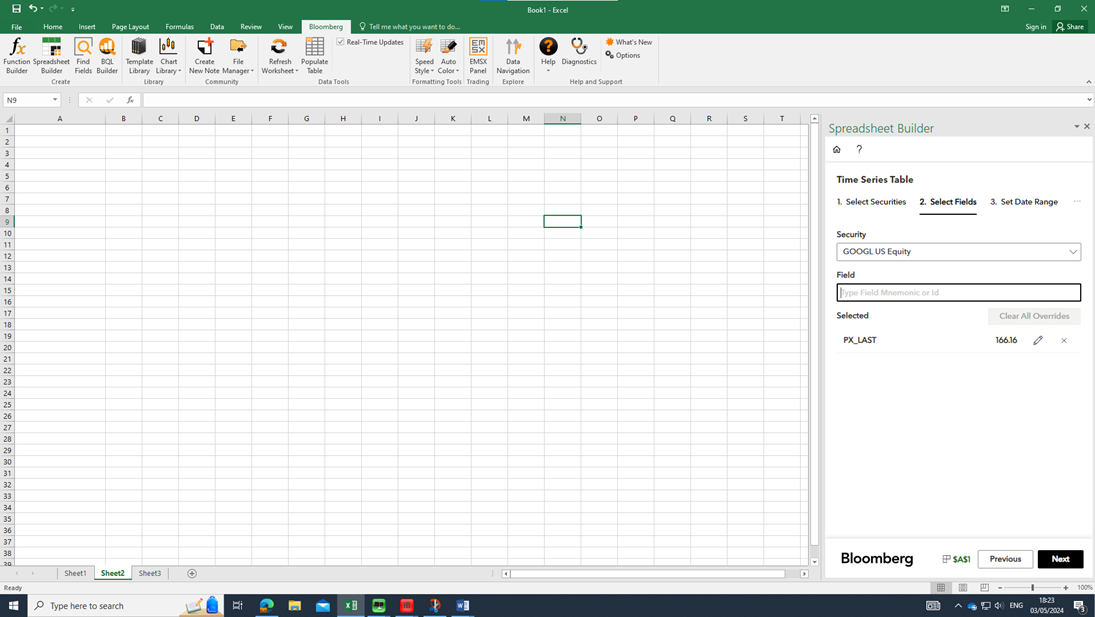 <br>

we are using PX_last instead of i.e. PX_mid. Firstly, it contains the latest available closing price for x security. Secondly DAX index did not have corresponding data for PX_mid or PX_ask so to maintain homogeniety between assets it is most sensible to choose PX_last.
This price data can then be used to calculate asset returns, needed for portfolio optimisation, by finding the percentage change in prices from one period to the next. Can be done by logarithmic returns or simple returns.


step 3) <br>  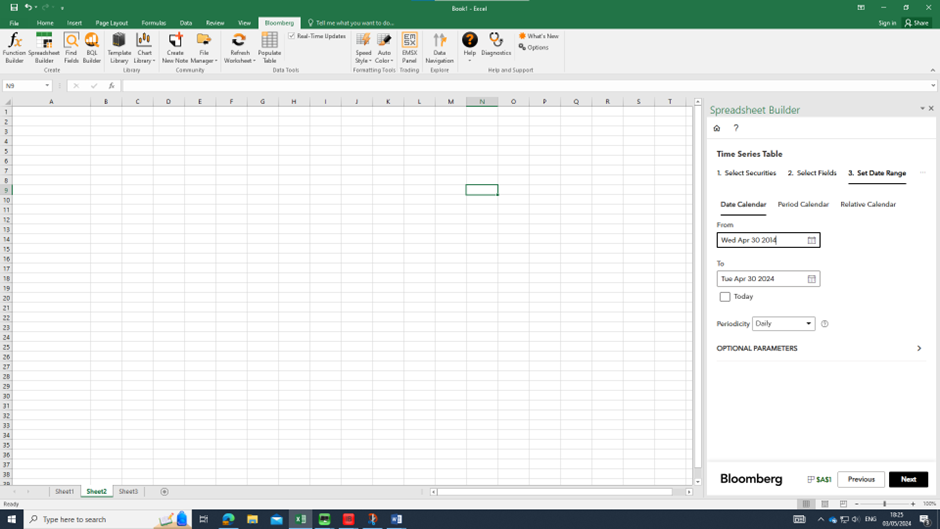 <br>

To maintain consistency with our midterm project, a 10yr period was chosen to account for exogynous economic shocks and spread the impact over a longer more stable period of time - long enough to account for upturns and downturns in the economy to get a better idea of our asset returns.


step 4) <br>   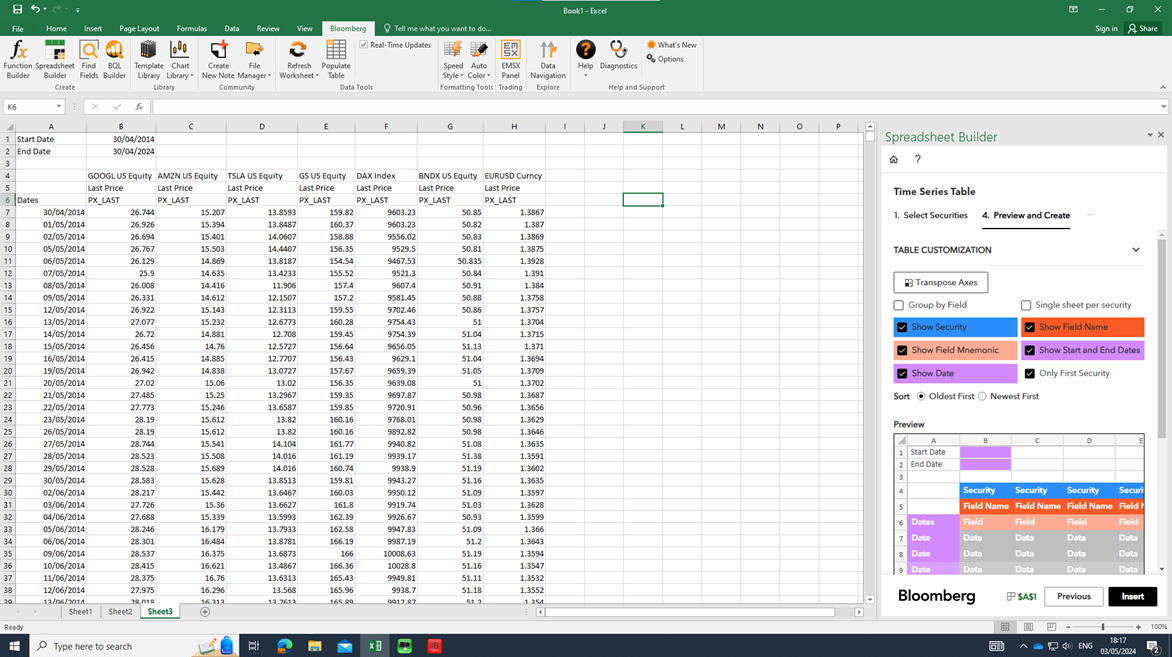 <br>

the table is then pasted with our required data which we save as a csv file for python to read and calculate from.


step 5) <br>  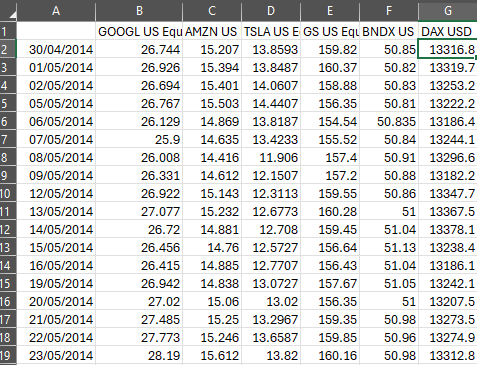 <br>

The final step is to convert DAX to USD by multiplying the closing price of each period by the EUR/USD currency to see what the closing price of each period was in euros. This is done in my csv file after transferring it to a non-bloomberg terminal. I also removed excess descriptive titles to make i plementation of the csv file in the code easier with having to drop rows e.c.t.


In [1]:
#step 1 is to import all the packages we will be needing for this notebook 

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# we need to read our csv file to read the price data  and give new column titles, done via pandas package.
data = pd.read_csv(r'C:\Users\shafe\Downloads\bloombs.csv', header=0)
new_column_names = ['Date', 'GOOGL', 'AMZN', 'TSLA', 'GS', 'BNDX', 'DAX_USD']
data.columns = new_column_names
data = data.dropna()
data.fillna(0, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
print (data.columns)

Index(['Date', 'GOOGL', 'AMZN', 'TSLA', 'GS', 'BNDX', 'DAX_USD'], dtype='object')


In [3]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

print(data.dtypes)

#the purpose of this code is to display results is a sensible way and make sure they are in correct form

Date       datetime64[ns]
GOOGL             float64
AMZN              float64
TSLA              float64
GS                float64
BNDX              float64
DAX_USD           float64
dtype: object


In [4]:
rets = np.log(data.drop(columns=['Date']) / data.drop(columns=['Date']).shift(1))

# We need to calculate the log returns, needed for our optimisation code, by using np.log function
# Convert the first column of our csv file to numeric type
data['GOOGL'] = pd.to_numeric(data['GOOGL'], errors='coerce')
data['AMZN'] = pd.to_numeric(data['AMZN'], errors='coerce')
data['TSLA'] = pd.to_numeric(data['TSLA'], errors='coerce')
data['GS'] = pd.to_numeric(data['GS'], errors='coerce')
data['BNDX'] = pd.to_numeric(data['BNDX'], errors='coerce')
data['DAX_USD'] = pd.to_numeric(data['DAX_USD'], errors='coerce')
data.reset_index(inplace=True)  # Set the date column as a normal data column
data.fillna(0, inplace=True)


#finding returns through logarithmic calculation as mentioned earlier 
rets = np.log(data.drop(columns=['Date', 'index']) / data.drop(columns=['Date', 'index']).shift(1))

# we need to convert daily returns to annualized returns (Assuming that there are 252 trading days per year)
rets.mean() * 252
cov_matrix = np.cov(rets, rowvar=False)


In [5]:
print(rets.mean)

<bound method NDFrame._add_numeric_operations.<locals>.mean of          GOOGL      AMZN      TSLA        GS      BNDX   DAX_USD
0          NaN       NaN       NaN       NaN       NaN       NaN
1     0.006782  0.012222 -0.000765  0.003435 -0.000590  0.000216
2    -0.008654  0.000455  0.015192 -0.009334  0.000197 -0.005000
3     0.002731  0.006601  0.026667 -0.016052 -0.000394 -0.002347
4    -0.024124 -0.041755 -0.044028 -0.011644  0.000492 -0.002712
...        ...       ...       ...       ...       ...       ...
2605  0.005482 -0.016567  0.113874 -0.002267 -0.004332 -0.002889
2606 -0.019865 -0.016674  0.048458 -0.007093 -0.001241 -0.006629
2607  0.097348  0.033687 -0.011168  0.017744  0.002687  0.010057
2608 -0.034313  0.007433  0.142427  0.007549  0.002474  0.000262
2609 -0.020491 -0.033490 -0.057101 -0.009563 -0.003094 -0.015471

[2610 rows x 6 columns]>


In [6]:
#Define the risk free rate
risk_free_rate = 0.035

def statistics(weights, rets, risk_free_rate):
    """
    Returns portfolio statistics.

    Parameters
    ==========
    weights : array-like
        Weights for different securities in the portfolio, including the risk-free asset.
    rets : DataFrame
        Daily returns of the assets.
    risk_free_rate : float
        Annual risk-free rate as a decimal.

    Returns
    =======
    pret : float
        Expected portfolio return.
    pvol : float

  Expected portfolio volatility.
    sharpe_ratio : float
        Sharpe ratio using the specified risk-free rate.
    """

    # Separate the risk-free weight from the risky asset weights by making 2 seperate arrays, one including and excluding the risk free weight
    risk_free_weight = weights[-1]
    risky_weights = weights[:-1]

    # Calculate expected portfolio return (annualized), risk free weight is included in the returns
    pret = np.sum(rets.mean() * risky_weights) * 252 + risk_free_weight * risk_free_rate

    # Calculate expected portfolio volatility (annualized), the risk free weight is not included the volatility
    pvol = np.sqrt(np.dot(risky_weights.T, np.dot(rets.cov() * 252, risky_weights)))

    # Calculate Sharpe ratio using the risk-free rate
    sharpe_ratio = (pret - risk_free_rate) / pvol

    return np.array([pret, pvol, sharpe_ratio])


In [7]:
from scipy.optimize import minimize

# number of assets being optimised
n_assets = rets.shape[1]

# our initial guess of weights, assume equal weights. This needs to be done for the optimisation function to proceed
init_weights = np.repeat(1/n_assets, n_assets)

# Setting Weight Constraints, weights cant be below 0 or greater than 1 and all weights must add upto 1
bounds = tuple((0, 1) for asset in range(n_assets))
total_weights_constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Define the function, maximize the Sharpe ratio.
def neg_sharpe_ratio(weights, rets, risk_free_rate):
    stats = statistics(np.append(weights, [1 - sum(weights)]), rets, risk_free_rate)
    return -stats[2]  # Minimizing the negative Sharpe ratio is equivalent to maximizing the Sharpe ratio.

# Solving the optimization Problem
optimized = minimize(neg_sharpe_ratio, init_weights, args=(rets, risk_free_rate), method='SLSQP', bounds=bounds, constraints=total_weights_constraint)

# Optimal weighting of our assets
opt_weights = optimized.x


# Cdisplauing the key Portfolio Statistics
portfolio_stats = statistics(np.append(opt_weights, [1 - sum(opt_weights)]), rets, risk_free_rate)
print(f"Optimal weighting: {opt_weights}")
print(f"Expected annualized rate of return: {portfolio_stats[0]:.2%}")
print(f"Expected annualized volatility: {portfolio_stats[1]:.2%}")
print(f"Sharpe ratio: {portfolio_stats[2]:.2f}")

# Calculating the covariance matrix
cov_matrix = rets.cov() * 252
print("\nCovariance matrix:")
print(cov_matrix)

Optimal weighting: [2.25804842e-01 6.47583496e-01 1.26611662e-01 1.01915004e-17
 0.00000000e+00 1.10588622e-17]
Expected annualized rate of return: 22.38%
Expected annualized volatility: 28.82%
Sharpe ratio: 0.66

Covariance matrix:
            GOOGL      AMZN      TSLA        GS      BNDX   DAX_USD
GOOGL    0.076027  0.057436  0.055166  0.035265  0.001033  0.020133
AMZN     0.057436  0.103140  0.068208  0.032012  0.001443  0.018754
TSLA     0.055166  0.068208  0.297671  0.045934  0.001213  0.030913
GS       0.035265  0.032012  0.045934  0.076891 -0.000206  0.029257
BNDX     0.001033  0.001443  0.001213 -0.000206  0.001830  0.000330
DAX_USD  0.020133  0.018754  0.030913  0.029257  0.000330  0.042190


In [8]:
opt_weights = np.array(opt_weights) #take the optimal weighs output as the input in array form
opt_weights_pct = opt_weights / opt_weights.sum() * 100 # convert to % form

print("Optimal weighting:")
for i, weight in enumerate(opt_weights_pct):
    print(f"{i+1}. {weight:.2f}%")

Optimal weighting:
1. 22.58%
2. 64.76%
3. 12.66%
4. 0.00%
5. 0.00%
6. 0.00%


# explaining certain key aspects of the optimisation code as required
)1*`r['x'] eisbe the result object returned by the `minimize` function fro `scipy.optimie`. Th `res['] x'iouris contely contains the optimal weights for the assetfor s r portfoliouio that the optimization algorithm has determined. These weihsat maximizes the Sharpe tio a which, as explained at the beginning of the noteboois is the objecti of theur optimization problem.) **`statistics(weights, rets, risk_free_rat\[This function calculates important portfolio metrics based on the given weights of the assets, their returns, and the risk-free rate.
weights: An array- like object containing weights for different securities in the portfolio, including the risk-free asset.\
rets: A DataFrame containing daily returns of the assets.\
risk free rate: The annual risk-free rate as a decimal.
u3) going back to q2, these calculated portfolio statistics of the statistics function correspond to:\
statistics(x)[0]= Expected annualized portfolio return, which includes both the returns from the risky assets and the risk-free asset.\
statistics(x)[1]= Expected annualized portfolio volatility, calculated using only the risky assets’ weights and their covariance matrix.\
statistics(x)[2]= Sharpe ratio of the portfolio, measuring the excess return per unit of volatility, using the risk-free rate as the benchmark r
iance matrix of
# results
Our optimal weighing array at the end in percentage form illustrates how much of our funds we should invest in each asset i.e. the most is 64.76% of our funds in AMZN.

we can expect an average return of 22.38%  from our portfolio per year, based on historial data. 

Our  portfolio’s value is expected to flucrtuate over a yea by 28.82% 


Sharpe ratio: A Sharpe ratio of 0.66 helps to understand the return of the portfolio relative to its risk. The higher the Sharpe ratio, the better the risk-ajThe usted return 

.xre matriourhis matrnumerito ually illustrates ws how returns of differeether assets move toget. 0.057436 is the degree to which the returns of GOOGLE and AMZN st-move together. WN. When the return on one stock increases, the return on the other stock tends invest more in them.\t increase as we 
lHowever when constructing a diversifshould alsoortfolio, we might look for assets with lower or even negative covariance values to reduce overall risk such as the negative covariance between GS and BNDX; Positive covariance like (GOOGLE and AMZN) might not provide as much diversification benefit because they tend to move in tectplease let me know!

# VaR

Value-at-Risk is a measure of the maximum potential change in value of a portfolio of financial instruments with a given probability over a pre-set horizon at a given confidence level(reference). 
VaR answers the question: how much can I lose with x% probability over a given time horizon. its an incredible tool for risk management commonly used in the investment climate to control risk exposure. Not to mention the VaR is measured as a price or percentage making it very easy to understand the extent of risk involved in an investment and allocate capital more efficiently.

How to calculate VR:a The method used to calculate VaR may involve assumptions about the distribution of returns. For the Variance-Covariance Method,ttThis method uses a more straightforward approach by assuming a normal distribution of returns and calculating VaR based on the standard deviation (volatility) and the mean (expected return) of the asset or portfolio. It’s a simpler model that doesn’t capture the path-dependent features that GBM can model in a Monte Carlo simulation.

 

Monte carlo simulation is a computationally intensive aproach  to calcuelat. It can accommodate non-normal distributions and other complexities by simulating the underlying risk factors (like asset prices) using appropriate models (like GBM for stocks) and then calculating the resulting portfolio returns. This allows for capturing a more realistic range of outcomes, including scenarios where the assumption of conditional normality is viold.ate This is the method we will be usi
y. 
By creating a large number of trials, this method can fully re-evaluate portfolios under a number of scena. sareTharee is 3 o s 
r
te
ps: 
1)	Scenario generation – we take inputs for volatility and correlation estimates for the assets in the portfolio and output a vast qua y of of future price scenarios determined by logl mar>
mo
   d2ls.
2)	Then a portfolio value is calculated for each scmeasure, the results of the simulation are repoe red ar>
 o

   r3) ed.
4)	Finally, determine VaR at the desired confidence interval by finding the return which corresponds to the specific percentise of dr>tribThis is why normality tests are important. Many models in Finance assume asset returns are normally distributed such as in BGM. If the data violates this assumption then the lack in accuracy will have drastic impacts such as an over or underestimation of risk leading to inefficient decision making. Normality tests assess if a dataset follows a normal distribution by providing insights on the shape of data distribution like skewness in addition to finding outliers.r
Other VaR assumptions include:\ 
ud

1) 
.
Historical Volatility as a Predictor: The historical volatility of asset returns is used as a predictor of future risk, assuming that historical patternsnue will conti

Since the method involves BGM we must also account for the BGM assumptions in fing VaR:

2) When using GBM in a Monte Carlo simulation, it assumes that the logarithmic returns of individual assets are normally distributed. However, the aggregate distribution of portfolio returns resulting from the simulation can be \nmal.
   
3) Constant Drift and Volatility: The model assumes tha (( \mu )), which represents the expected return, and the aka tilit( \sigma )), which represents the standard deviation of returns, are constant\me.
   
4) 
Independent and Stationary Increments: The model assumes that the changes in the logarithm of asset prices are independent and identically distributed, with no autocorrelatio\ver time
4)
Continuous Market: GBM assumes that trading continues continuously over time, and there are no jumps or gaps in a RBefore we can move onto the VaR code we need to perform step 1 - done by GBM, Geometric Brownian Motion. Motion:

br>

VaR calculations often use the results of GBM simulations to estimate the potential losses in a portfolio. By simulating many possible pathsreweice pawe, you can calculate the distribution of returns and then determine the maximum loss that will not be exceeded with a certain confidence level over a given  ng outliers.


# GBM

The Geometric Brownian Motion (GBM) process is a lognormal model used to simulate the likely future price paths of our assets. It’s widely used in finance for modeling stock prices because it incorporates key characteristics of asset returns: the drift and the randomness of price movements. I will be using this section to explain these terms which are part of the GBM simulation function.


The drift component represents the average expected return of the asset over time. It’s calculated using the risk-free rate r minus half the variance of the asset’s returns (0.5 * sigma ** 2). This term adjusts the drift by the variance to account for the distance the stock price will drift on average per time step. 


The randomness in the price movement is modeled using a random shock term. This term is sigma * np.sqrt(dt) * z, where z is a random sample from a standard normal distribution. This term includes volatility into the simulated price path, reflecting the uncertainty and variability of asset prices.


The exponential function np.exp() is used to ensure that the simulated prices remain positive, as stock prices cannot be negative. The GBM model assumes that the logarithm of the asset prices follows a normal distribution, which means the asset prices themselves follow a log-normal distribution.


The time interval dt is the fraction of your chosen time horizon T divided by the number of time steps M. This determines how finely we are simulating the price path within the time horizon.


The loop for t in range(1, M + 1): iterates over each time step, updating the price path array S with the new simulated prices at each step.


The GBM formula used in the code is:
$$
S_t = S_{t-1} \times \exp \left( \left( r - \frac{1}{2} \sigma^2 \right) \times dt + \sigma \times \sqrt{dt} \times Z_t \right)
$$

where:

( S_t ) is the simulated price at time ( t ).\
( S_{t-1} ) is the simulated price at the previous time step.\
( r ) is the risk-free rate.\
( \sigma ) is the volatility of the asset.\
( dt ) is the length of the time interval.\
( Z_t ) is a random variable from the standard normal distribution.

The function generates I simulated price paths over M time steps, using random shocks from a standard normal distribution to model the uncertainty in price movements.


Statistics for GOOGL:
Statistics of the simulated prices:
Mean: 168.55
Median: 168.52
Standard Deviation: 2.91
Minimum: 157.01
Maximum: 180.80


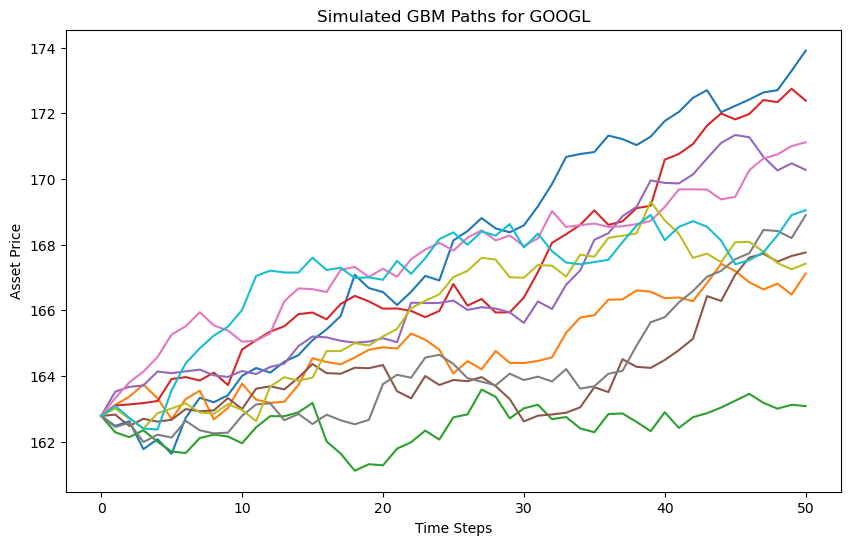

Statistics for AMZN:
Statistics of the simulated prices:
Mean: 181.18
Median: 181.16
Standard Deviation: 3.72
Minimum: 168.65
Maximum: 196.16


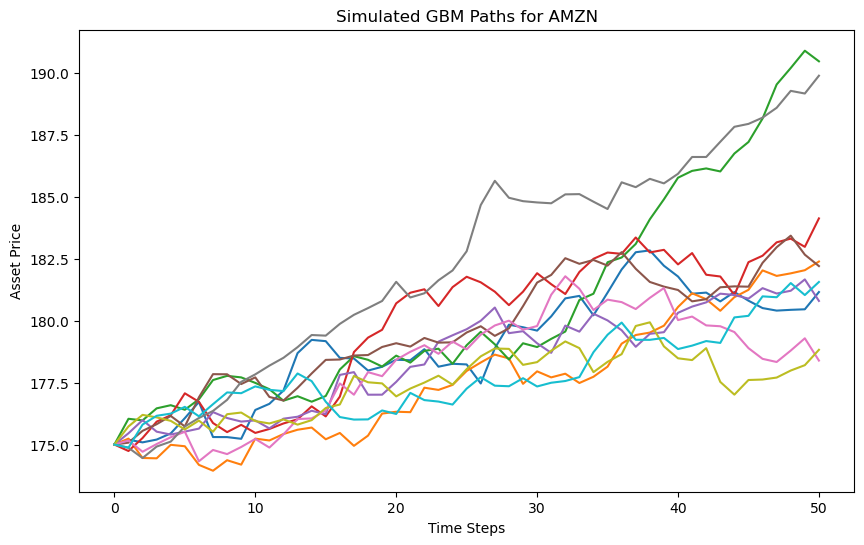

Statistics for TSLA:
Statistics of the simulated prices:
Mean: 189.85
Median: 189.76
Standard Deviation: 6.57
Minimum: 166.49
Maximum: 215.85


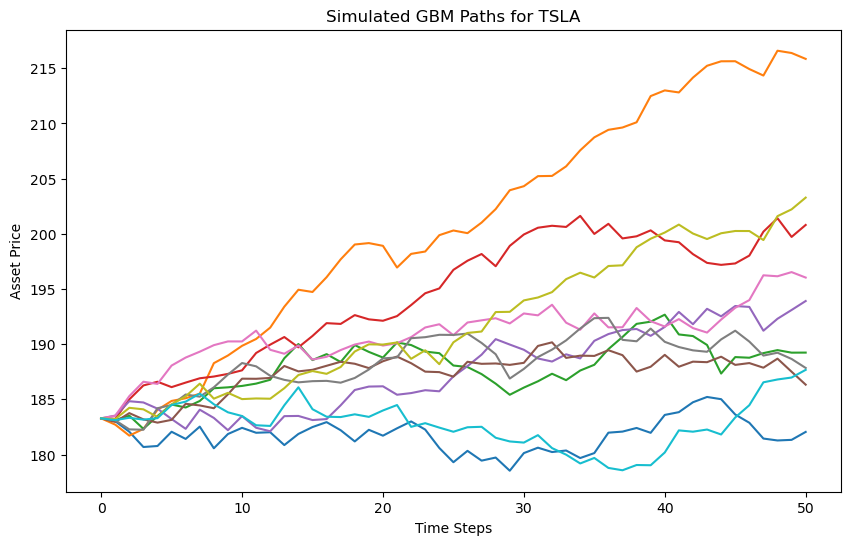

Statistics for GS:
Statistics of the simulated prices:
Mean: 441.91
Median: 441.94
Standard Deviation: 7.72
Minimum: 410.20
Maximum: 476.64


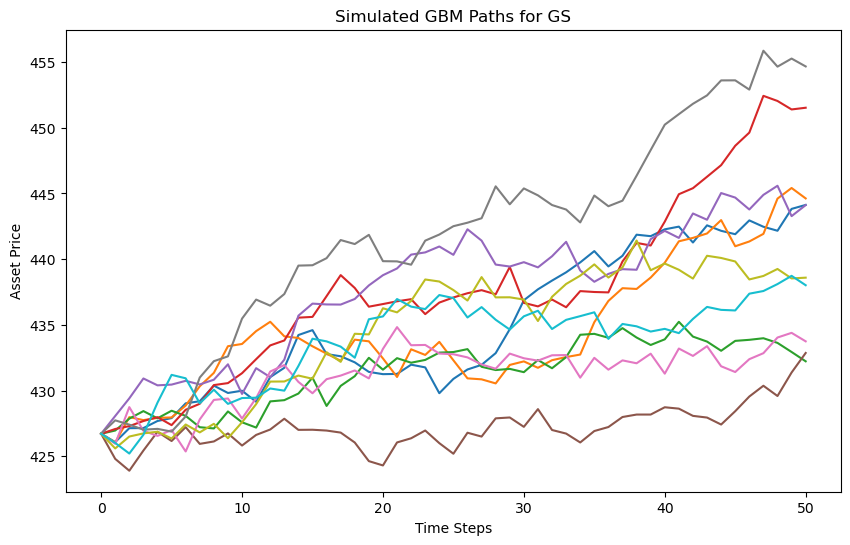

Statistics for BNDX:
Statistics of the simulated prices:
Mean: 50.14
Median: 50.13
Standard Deviation: 0.13
Minimum: 49.55
Maximum: 50.77


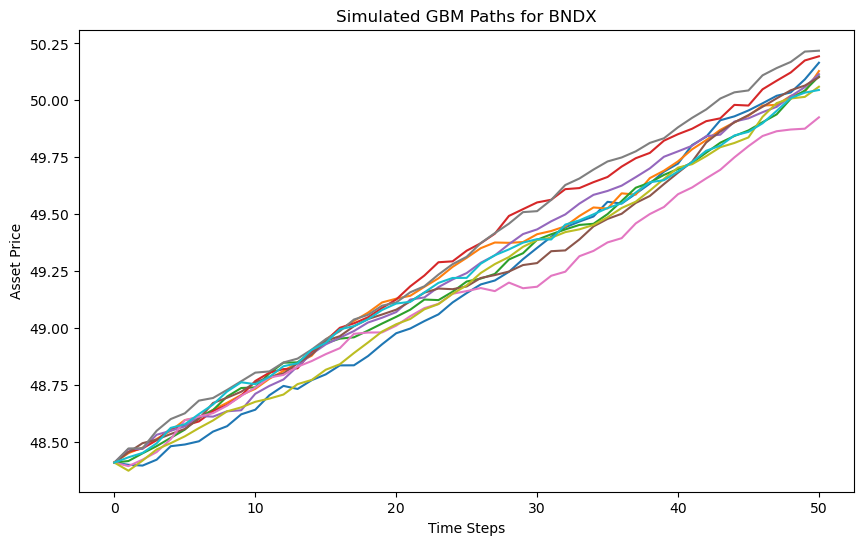

Statistics for DAX_USD:
Statistics of the simulated prices:
Mean: 19808.66
Median: 19806.63
Standard Deviation: 258.39
Minimum: 18873.36
Maximum: 20779.10


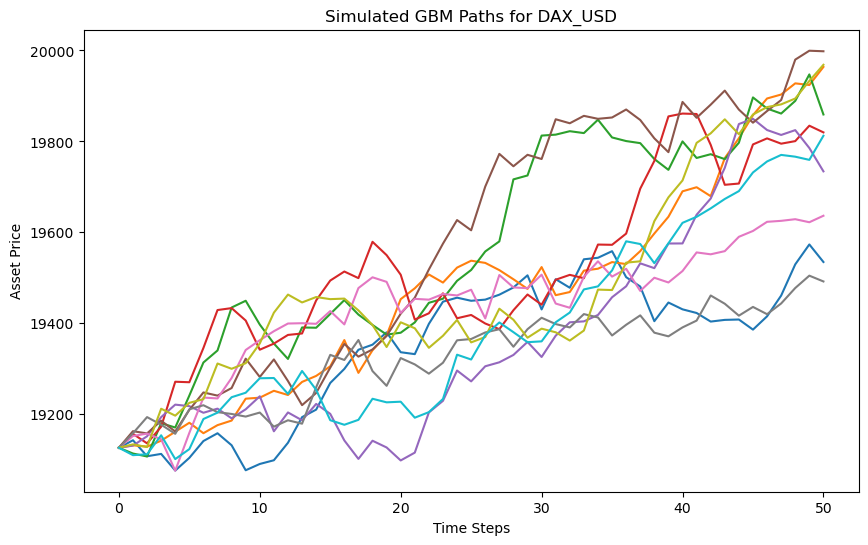

In [9]:
import numpy as np
import pandas as pd

# GBM simulation function
def simulate_gbm(S0, T, r, sigma, I, M=50): #r: The risk-free rate, representing the time value of money.
    dt = T / M  # Length of time interval
    S = np.zeros((M + 1, I))  # Array to store the simulation results
    S[0] = S0  # Set initial value, S0: The initial stock price or portfolio value at time zero.

    for t in range(1, M + 1):
        z = np.random.standard_normal(I)  # Random numbers for simulation
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return S

# Function to print statistics of simulation results
def print_statistics(array):
    print("Statistics of the simulated prices:")
    print(f"Mean: {np.mean(array):.2f}")
    print(f"Median: {np.median(array):.2f}")
    print(f"Standard Deviation: {np.std(array):.2f}")
    print(f"Minimum: {np.min(array):.2f}")
    print(f"Maximum: {np.max(array):.2f}")

# Function to plot simulated GBM paths
def plot_gbm_simulation(simulation, asset_name, num_paths=10):
    """
    Plots simulated GBM paths for an asset.

    Parameters:
    simulation : numpy.ndarray
        Array of simulated asset price paths
    asset_name : str
        Name of the asset
    num_paths : int
        Number of paths to plot
    """
    plt.figure(figsize=(10, 6))
    for i in range(num_paths):
        plt.plot(simulation[:, i], lw=1.5)
    plt.title(f'Simulated GBM Paths for {asset_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Asset Price')
    plt.show()
    


# Number of simulations and time steps
I = 10000  # Number of simulations, I: The number of simulation iterations or paths.
M = 50  # Number of time steps, M: The number of time intervals for the simulation, defaulting to 50 if not provided.
T = 1.0  # Time horizon (1 year), T: The total time horizon for the simulation.

# Risk-free rate from your code
risk_free_rate = 0.035  # Make sure this is the annualized rate

# Dictionary to store the GBM simulations for each asset
gbm_simulations = {}

# Loop through each asset in the portfolio
for asset in rets.columns:
    S0 = data[asset].iloc[-1]  # Last known price for the asset is used for s0
    sigma = np.sqrt(rets[asset].var())  # sigma: Estimate of volatility using variance of the asset's returns
    gbm_simulations[asset] = simulate_gbm(S0, T, risk_free_rate, sigma, I, M) 
#simulates the future stock prices or portfolio values using the Geometric Brownian Motion model, which is a stochastic process. 

# Print statistics for the final simulated prices of each asset
for asset, simulation in gbm_simulations.items():
    print(f"Statistics for {asset}:")
    print_statistics(simulation[-1])
    plot_gbm_simulation(simulation, asset)


# understanding GBM results
Firstly, lets talk about the statistics, using an older random generated GOOGL simulation result: 

Mean (165.67): This is the average of the simulated stock prices. It’s a central point around which the future prices are expected to fluctuate.\
Median (165): This is the middle value of the simulated price\.
Standard Deviation (2.92): This measures the amount of variation from the mean. A higher standard deviation indicates greater price volatility, which would affect the a\\R.
Minimum (158.84) & Maximum (179.29): These values show the range of the simulated prices. The difference between them can be used to understand the potential spread ofsk/ potential volatility of the stock prices. ri

understanding the grap



Y-Axis (Asset Price): The vertical axis shows the range of possible stock prices that GOOGL co uldfluctuate accordngg to the simulation. It’s labeled from approximately 164 to 172, indicating the simulated asset price rane\.
X-Axis (Time Steps): The horizontal axis represents the progression of time in the simulation, labeled from zero to fifty. Each time step could represent a day, week, or any other unit of time, depending on the specifics of the simuonlati - ending at chosen time our.\n.
Colored Lines: The different colors of theslinay represent different scenarios or variables considered in the simulation. For example, they could represent different volatility assumptions, changes in market conditions, or other factors that might affect the stoc pri

ce.
The purpothesuch a graph is to visualize the range of possible outcomes for the stock price over time. By analyzing these outcomes, invalysts can estimate the probability of various price levels being reached. This information is crucial for risk mentmanage and their tools likto help make aking informed investment decisions.

In the context of Value at Ri:k (VaR), this graph helps in understanding the distribution of potential future prices. VaR would typically be calculated by determining the worst-case loss that would not be exceeded with a certain confidence level (e.g., 95% or 99%) over a given time period. The graph provides a visual representation of where that loss threshold might lie based on the mulate.\ we e caneyou would typically use these statistics to determine the likelihood of a certain level of losamplFor exwe , if you want to calculate the 1-day VaR at a 95%ce onfidenweevel, you would find the point on the distribution of simulated prices that corresponds to the 5% worst outcomes. This point would represent the maximum expected loss over a day that should not be exceedetd 95% of hTo summarise, t time.

The GBM paths in the graph represent different potential future scenarios for the stock price. By hesalyzing twe paths, you can estimate the probability of various outcomes, which is essential for calc.ulating VaR

Number of assets in 'data': 6
Number of weights in 'opt_weights': 6


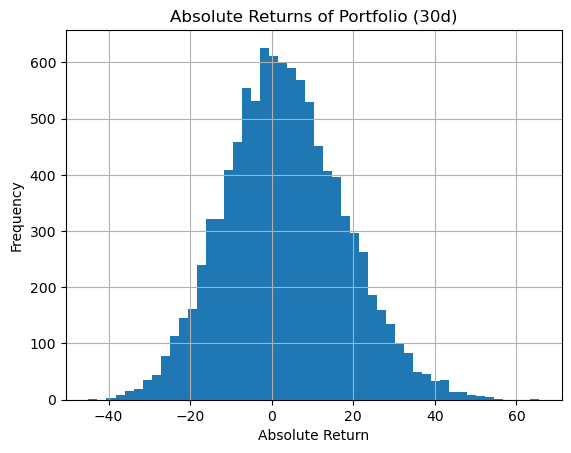

Confidence Level    Value-at-Risk
---------------------------------
           99.99           39.391
           99.90           36.384
           99.00           28.839
           97.50           23.942
           95.00           20.022
           90.00           15.244


In [10]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

# Read the price data CSV file and give new column titles
data = pd.read_csv(r'C:\Users\shafe\Downloads\bloombs.csv', header=0)
new_column_names = ['Date', 'GOOGL', 'AMZN', 'TSLA', 'GS', 'BNDX', 'DAX_USD']
data.columns = new_column_names
data = data.dropna()
data.fillna(0, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')


opt_weights = opt_weights = optimized.x  

# Check the number of assets and weights
num_assets = len(new_column_names) - 1  # Exclude 'Date' column
num_weights = len(opt_weights)

print(f"Number of assets in 'data': {num_assets}")
print(f"Number of weights in 'opt_weights': {num_weights}")

# Ensure that 'opt_weights' has the correct length
if num_assets == num_weights:
    # Proceed with the calculation
    S0 = np.sum(data.iloc[-1, 1:] * opt_weights)  # Initial investment, differet to BGM excluding 'Date' column
    #  s0 is calculated as the sum of the last known prices of each asset multiplied by their respective weights in the portfolio.
    #The code for S0 is designed to establish the starting value of the portfolio before any market movements or returns are factored in.
else:
    print("The number of weights does not match the number of assets. Please check 'data' and 'opt_weights'.")



# Calculate key portfolio statistics
portfolio_stats = statistics(np.append(opt_weights, [1 - sum(opt_weights)]), rets, risk_free_rate) #calling our statistics function array and its stored values
r = portfolio_stats[0]  # Expected portfolio return (pret), we are assuming volatility isnt fixed
sigma = portfolio_stats[1]  # Expected portfolio volatility (pvol)

# Time horizon for VaR calculation (30 days), since all our portfolio statistics are annualised we need to divide over a year to get the time horizon
T = 30 / 365.

# Number of simulations
I = 10000

# Simulate GBM for the portfolio and calculate portfolio end prices
portfolio_end_prices = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))

# Sort the simulated portfolio returns
R_gbm = np.sort(portfolio_end_prices - S0)

# Plot histogram of the simulated portfolio returns
plt.hist(R_gbm, bins=50)
plt.xlabel('Absolute Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Absolute Returns of Portfolio (30d)')
plt.show()

# Confidence levels for VaR calculation
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]

# Calculate VaR at different confidence levels
var = scs.scoreatpercentile(R_gbm, percs)

# Print the VaR results
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))


# VaR results
understanding the graph:
# Histogram: Absolute Returns of Portfolio (30\dThe  **X-A which *: Ranges fro40 -2 60o 3, repressing the absolute returns of the portfol\
The - **Y-A**: Represents the number of occurrences for each level of absolute ret\uThe 
- **Bell-Shaped  h**: Indicates that the returns are normally distributed, with most outcomes clustering around the mean and fewewes you move away from the centUnderstanding the confidence level table:\
ulated. Higher confidence levels correspond to more extreme potential\ es.
- **Valu **: This column shows the VaR values for the corresponding confidence levels. These numbers represent the maximum expected loss over the 30-day period that should not be exceeded with a given level of consvided:- 148, meaning there is a 0.01% chance that the portfolio will lose e VaRre tha in this case 40.871n\  value
- there is a 0.10% chance that the portfolio will lose more than the VaR value in this case 36.907.\nis 0os:  there is a 0.99% chance that the portfolio will lose more than the VaR value in this case 28.596.\ and so on, these values wont be the same every run through as BGM is randomhan this amount.

The histogram visually represents the distribution of returns from which the VaR is derived. The table provides a qui.e. ick reference for risk managers to assess the potential losses at various levels of statistical confidence. This information is crucial for making informed decisions ab, investment and reallocation decisions.adeterministic-2720a0b541b1.

# Garch

Generalized AutoRegressive Conditional Heteroskedasticity (GARCH) is a statistical model used to estimate the volatility of returns on financial assets.

GARCH models are more sophisticated and provide a more nuanced view of volatility, essential for financial time series analysis. They are better suited for  non-constant volatility data and are influenced by past events, making them a valuable tool for investors. In other words, Garch allows the prediction of the variance of the returns. This is done by several financial institutions for their own risk management and is an "easier" task because there is a very clear autocorrelation for variance.(reference:http://localhost:8888/notebooks/Downloads/Forecasting-VAR-Granger-Causality.ipynb)

to be more precise this is the formula that pvol will be subjeted to:

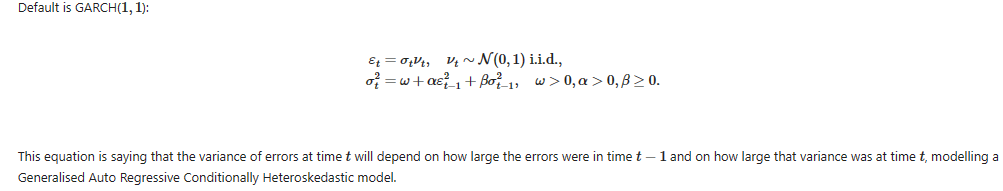

We will run through the whole process with pvol changing to the garch statistic and explaining what potentially is the reason for the change

In [11]:
# Check for NaN values
if rets.isna().any().any():
    # Handle NaN values, for example, by filling them with zeros
    rets.fillna(0, inplace=True)

# Check for infinite values
if not np.all(np.isfinite(rets)):
    # Handle inf values, for example, by replacing them with a large finite number
    rets.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
# without thise section my garch code wouldnt function, better ceaning of data essentially in my csv file with replacing all NaN and infinite values

In [12]:
import numpy as np
from arch import arch_model

# Define the GARCH volatility function
def garch_volatility(returns):
    try:
        # Fit the GARCH model
        returns = returns * 100
        model = arch_model(returns, vol='Garch', p=1, q=1) # we are using the default garch(1,1) which the earlier equation illustrates
        model_fit = model.fit(disp='off')
        
        # Get the last day's forecast of the variance
        forecast = model_fit.forecast(horizon=1)
        var = forecast.variance.values[-1, :]
        
        # Annualize the volatility
        garch_vol = np.sqrt(var * 252)/ 100
        return garch_vol
    except Exception as e:
        print(f"An error occurred in garch_volatility: {e}")
        # Return a default or previous volatility value or handle as appropriate
        return None

# Define the risk-free rate
risk_free_rate = 0.035

def statistics(weights, rets, risk_free_rate):
    # Separate the risk-free weight from the risky asset weights
    risk_free_weight = weights[-1]
    risky_weights = weights[:-1]
    
    # Calculate expected portfolio return (annualized)
    pret = np.sum(rets.mean() * risky_weights) * 252 + risk_free_weight * risk_free_rate #pret is the same, so is essentially everything else par pvol
    
    # Calculate expected portfolio volatility using GARCH
    pvol = garch_volatility(rets.dot(risky_weights))
    if pvol is None:
        # Handle the case where garch_volatility failed and returned None
        pvol = 0  # Or use a default/previous volatility value
    
    # Calculate Sharpe ratio using the risk-free rate
    # Protect against division by zero if pvol is zero
    sharpe_ratio = (pret - risk_free_rate) / pvol if pvol != 0 else 0
    
    # Convert pret, pvol, and sharpe_ratio to scalars if they are not already
    pret = np.array(pret).item()
    pvol = np.array(pvol).item()
    sharpe_ratio = np.array(sharpe_ratio).item()

    return np.array([pret, pvol, sharpe_ratio])





In [13]:
from scipy.optimize import minimize

# Assets number
n_assets = rets.shape[1]

# Initial weights, assumed equal weights
init_weights = np.repeat(1/n_assets, n_assets)

# Setting Weight Constraints
bounds = tuple((0, 1) for asset in range(n_assets))
total_weights_constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Define the function, maximize the Sharpe ratio.
def neg_sharpe_ratio(weights, rets, risk_free_rate):
    stats = statistics(np.append(weights, [1 - sum(weights)]), rets, risk_free_rate)
    return -stats[2]  # Minimizing the negative Sharpe ratio is equivalent to maximizing the Sharpe ratio.

# Solving Optimization Problems
optimized = minimize(neg_sharpe_ratio, init_weights, args=(rets, risk_free_rate), method='SLSQP', bounds=bounds, constraints=total_weights_constraint)

# Optimal weighting
opt_weights = optimized.x


# Calculating Portfolio Statistics
portfolio_stats = statistics(np.append(opt_weights, [1 - sum(opt_weights)]), rets, risk_free_rate)
print(f"Optimal weighting: {opt_weights}")
print(f"Expected annualized rate of return: {portfolio_stats[0]:.2%}")
print(f"Expected annualized volatility: {portfolio_stats[1]:.2%}")
print(f"Sharpe ratio: {portfolio_stats[2]:.2f}")

# Calculating covariance matrix
cov_matrix = rets.cov() * 252
print("\nCovariance matrix:")
print(cov_matrix)

Optimal weighting: [0.20974977 0.29118599 0.13911551 0.08822443 0.1960543  0.07567   ]
Expected annualized rate of return: 15.00%
Expected annualized volatility: 24.36%
Sharpe ratio: 0.47

Covariance matrix:
            GOOGL      AMZN      TSLA        GS      BNDX   DAX_USD
GOOGL    0.075998  0.057414  0.055145  0.035251  0.001032  0.020126
AMZN     0.057414  0.103100  0.068182  0.031999  0.001442  0.018747
TSLA     0.055145  0.068182  0.297557  0.045917  0.001213  0.030901
GS       0.035251  0.031999  0.045917  0.076861 -0.000206  0.029245
BNDX     0.001032  0.001442  0.001213 -0.000206  0.001829  0.000330
DAX_USD  0.020126  0.018747  0.030901  0.029245  0.000330  0.042173


In [14]:
opt_weights = np.array(opt_weights)
opt_weights_pct = opt_weights / opt_weights.sum() * 100

print("Optimal weighting:")
for i, weight in enumerate(opt_weights_pct):
    print(f"{i+1}. {weight:.2f}%")

Optimal weighting:
1. 20.97%
2. 29.12%
3. 13.91%
4. 8.82%
5. 19.61%
6. 7.57%


Statistics for GOOGL:
Statistics of the simulated prices:
Mean: 168.61
Median: 168.58
Standard Deviation: 2.94
Minimum: 157.87
Maximum: 180.06


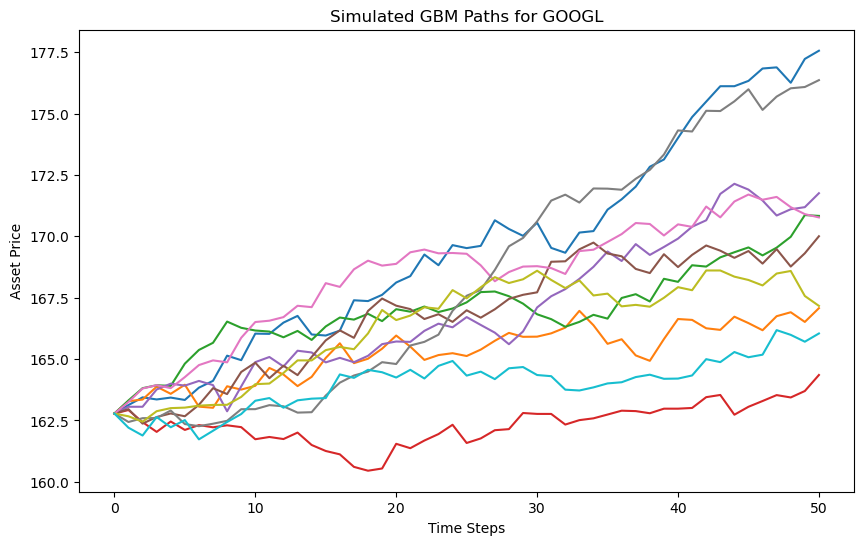

Statistics for AMZN:
Statistics of the simulated prices:
Mean: 181.27
Median: 181.21
Standard Deviation: 3.66
Minimum: 167.48
Maximum: 197.49


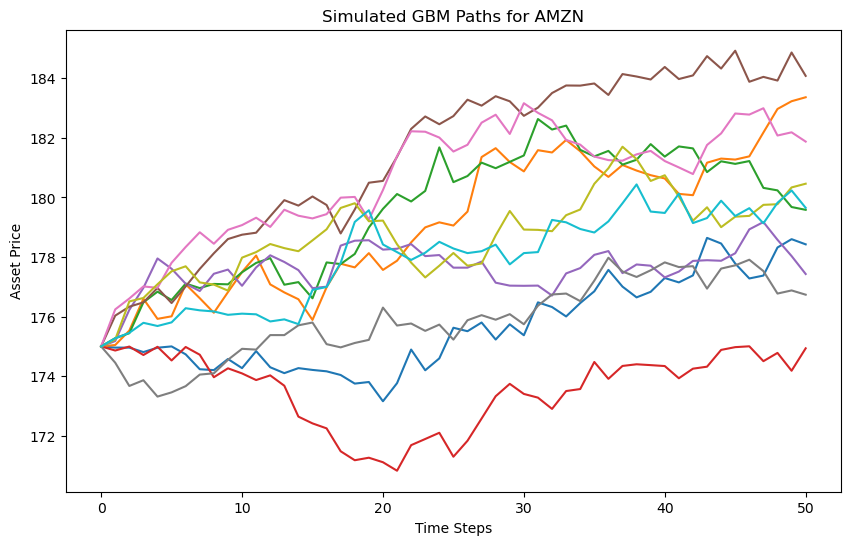

Statistics for TSLA:
Statistics of the simulated prices:
Mean: 189.89
Median: 189.78
Standard Deviation: 6.52
Minimum: 166.66
Maximum: 215.16


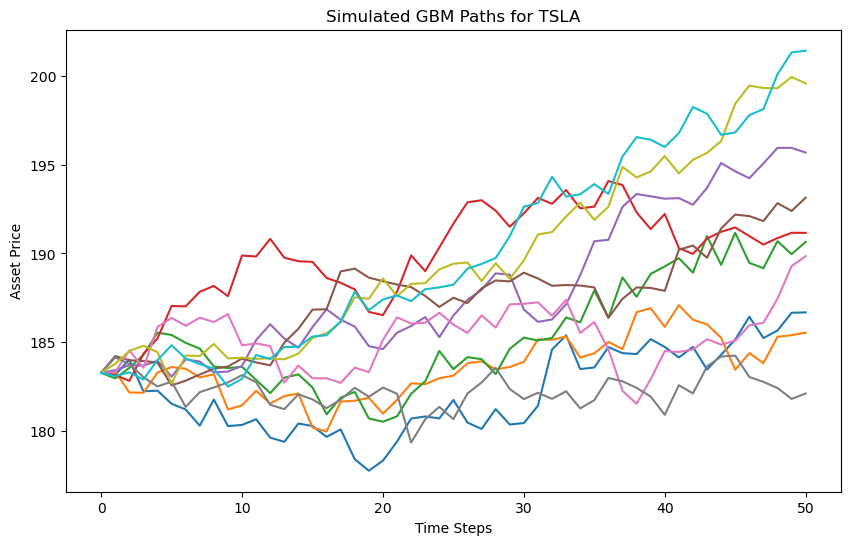

Statistics for GS:
Statistics of the simulated prices:
Mean: 441.89
Median: 441.88
Standard Deviation: 7.74
Minimum: 408.38
Maximum: 469.88


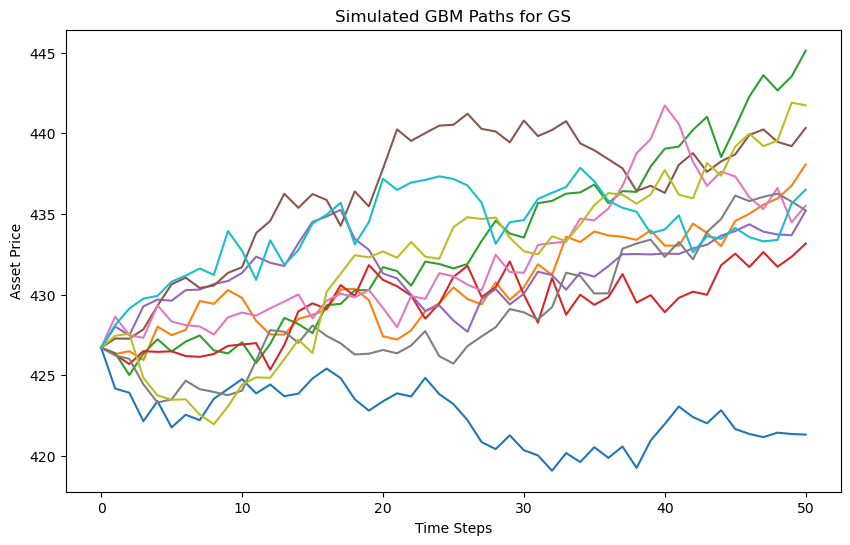

Statistics for BNDX:
Statistics of the simulated prices:
Mean: 50.13
Median: 50.13
Standard Deviation: 0.14
Minimum: 49.61
Maximum: 50.62


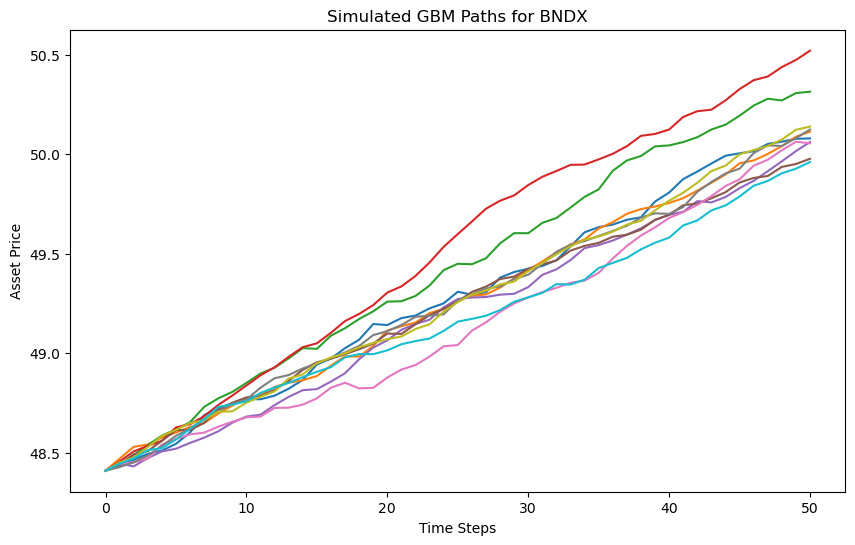

Statistics for DAX_USD:
Statistics of the simulated prices:
Mean: 19809.45
Median: 19808.03
Standard Deviation: 256.15
Minimum: 18917.60
Maximum: 20823.80


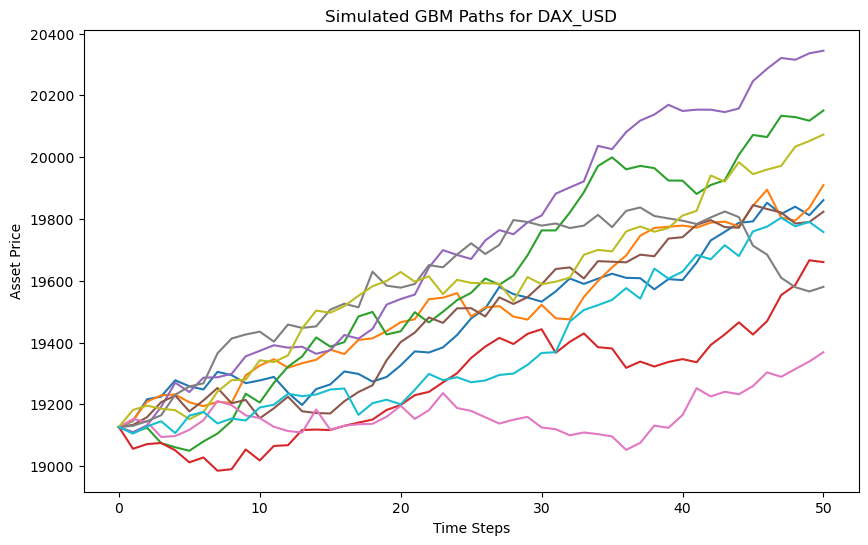

In [15]:
import numpy as np
import pandas as pd

# GBM simulation function
def simulate_gbm(S0, T, r, sigma, I, M=50):
    dt = T / M  # Length of time interval
    S = np.zeros((M + 1, I))  # Array to store the simulation results
    S[0] = S0  # Set initial value

    for t in range(1, M + 1):
        z = np.random.standard_normal(I)  # Random numbers for simulation
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return S

# Function to print statistics of simulation results
def print_statistics(array):
    print("Statistics of the simulated prices:")
    print(f"Mean: {np.mean(array):.2f}")
    print(f"Median: {np.median(array):.2f}")
    print(f"Standard Deviation: {np.std(array):.2f}")
    print(f"Minimum: {np.min(array):.2f}")
    print(f"Maximum: {np.max(array):.2f}")

# Function to plot simulated GBM paths
def plot_gbm_simulation(simulation, asset_name, num_paths=10):
    """
    Plots simulated GBM paths for an asset.

    Parameters:
    simulation : numpy.ndarray
        Array of simulated asset price paths
    asset_name : str
        Name of the asset
    num_paths : int
        Number of paths to plot
    """
    plt.figure(figsize=(10, 6))
    for i in range(num_paths):
        plt.plot(simulation[:, i], lw=1.5)
    plt.title(f'Simulated GBM Paths for {asset_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Asset Price')
    plt.show()
    
# Assume you have the optimized weights from your portfolio optimization
# opt_weights = ...

# Number of simulations and time steps
I = 10000  # Number of simulations
M = 50  # Number of time steps
T = 1.0  # Time horizon (1 year)

# Risk-free rate from your code
risk_free_rate = 0.035  # Make sure this is the annualized rate

# Dictionary to store the GBM simulations for each asset
gbm_simulations = {}

# Loop through each asset in the portfolio
for asset in rets.columns:
    S0 = data[asset].iloc[-1]  # Last known price for the asset
    sigma = np.sqrt(rets[asset].var())  # Estimate volatility using variance of the asset's returns
    gbm_simulations[asset] = simulate_gbm(S0, T, risk_free_rate, sigma, I, M)

# Print statistics for the final simulated prices of each asset
for asset, simulation in gbm_simulations.items():
    print(f"Statistics for {asset}:")
    print_statistics(simulation[-1])
    plot_gbm_simulation(simulation, asset)

Number of assets in 'data': 6
Number of weights in 'opt_weights': 6


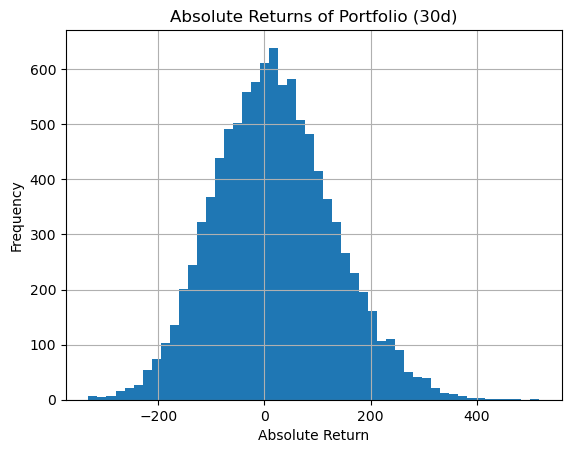

Confidence Level    Value-at-Risk
---------------------------------
           99.99          329.250
           99.90          300.314
           99.00          223.167
           97.50          187.700
           95.00          157.436
           90.00          121.497


In [16]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

# Read the price data CSV file and give new column titles
data = pd.read_csv(r'C:\Users\shafe\Downloads\bloombs.csv', header=0)
new_column_names = ['Date', 'GOOGL', 'AMZN', 'TSLA', 'GS', 'BNDX', 'DAX_USD']
data.columns = new_column_names
data = data.dropna()
data.fillna(0, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Assume you have the optimized weights from your portfolio optimization
opt_weights = opt_weights = optimized.x  # Replace with your actual optimized weights

# Check the number of assets and weights
num_assets = len(new_column_names) - 1  # Exclude 'Date' column
num_weights = len(opt_weights)

print(f"Number of assets in 'data': {num_assets}")
print(f"Number of weights in 'opt_weights': {num_weights}")

# Ensure that 'opt_weights' has the correct length
if num_assets == num_weights:
    # Proceed with the calculation
    S0 = np.sum(data.iloc[-1, 1:] * opt_weights)  # Initial investment, excluding 'Date' column
    # ... (rest of your code for VaR calculation)
else:
    print("The number of weights does not match the number of assets. Please check 'data' and 'opt_weights'.")

# Define the statistics function to calculate expected return and volatility
# ... (your statistics function here)

# Calculate key portfolio statistics
portfolio_stats = statistics(np.append(opt_weights, [1 - sum(opt_weights)]), rets, risk_free_rate)
r = portfolio_stats[0]  # Expected portfolio return (pret)
sigma = portfolio_stats[1]  # Expected portfolio volatility (pvol)

# Time horizon for VaR calculation (30 days)
T = 30 / 365.

# Number of simulations
I = 10000

# Simulate GBM for the portfolio and calculate portfolio end prices
portfolio_end_prices = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))

# Sort the simulated portfolio returns
R_gbm = np.sort(portfolio_end_prices - S0)

# Plot histogram of the simulated portfolio returns
plt.hist(R_gbm, bins=50)
plt.xlabel('Absolute Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Absolute Returns of Portfolio (30d)')
plt.show()

# Confidence levels for VaR calculation
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]

# Calculate VaR at different confidence levels
var = scs.scoreatpercentile(R_gbm, percs)

# Print the VaR results
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))


# comparing garch to non-garch

non-garch:\
Optimal weighting: [2.25804842e-01 6.47583496e-01 1.26611662e-01 1.01915004e-17
 0.00000000e+00 1.10588622e-17\]
Expected annualized rate of return: 22.3\8%
Expected annualized volatility: 28.8
Optimal weights:\2garch:\
Optimal weighting: [0.20974977 0.29118599 0.13911551 0.08822443 0.1960543  0.07567   ]\
Expected annualized rate of return: 15.00\%
Expected annualized volatility: 24.3

Not only has garch allocate weights to all assets but garch has lower pret but also lower pvol. This is unsprising as garch models focus on risk-adjusted returns. By accounting for the time-varying nature of volatility, garch models may allocate weights in a way that reduces the portfolio’s overall risk. This is reflected by the lower expected annualized volatility.

VaR
garch:
Confidence Level    Value-at-Risk            --------
           99.99          323.205
           99.90          289.964
           99.00          22     vs.877
           97.50          192.452
           95.00          164.341
           90.00   

non garch:

Confidence Level    Value-at-Risk-
           99.99           42.721
           99.90           37.057
           99.00           27.761
           97.50           23.716
           95.00           19.558
           90.00           
VaR is also drastically different and much greater for garch. s is unsprising as 

%



Now why could this be the case exactly, what does th
garch models are sensitive to recent market movements so perhaps covid or the recent china's stock market nightmare have lead to periods of high volatility. The garch model will reflect this in its predictions, resulting in higher VaR estimates. In other words: garch accounts for the possibility of extreme market movements and witholds a more conservative approach to risk estimation.
e new pvol do differently?



# Conclusion

We optimise portfolios to maximise our risk adjusted return - the portfolio with the highest risk adjusted return is the most efficient. There are many measures and methods to do so, we chose a statisctics function to measure our portfolio volatility and returns. Along with the choice of the monte-carlo method we created many asset price paths to combine with our earlier findings to estimate our Value at risk. By combining these aspects we get a histogram which shows how much we can lose from our portfolio in a certain timespan. 

If we relax the volatility assumtption to be less fixed representing reality more we then we can use the garch function to estimate this volatility for a more conservative risk estimation and a potentially a safer VaR.

However it is also important that our data is accuratly recorded and used, errors in our data can lead to a violation of the assumption of conditional normality and calculations themselves. On a final note, the Uk economy and practically every economy has gone through multiple high volatility events which span to 2019 - over 5 years ago. This makes it harder to rely on historical data and estimate future price paths which could lead to an overly risk cautious portfolio.



# addiontial info/weird bug:
ive been having a mortyfying markdown cell visual error where after running markdown cells - words become scrambled and new text gets added in and when going back to the cell the contents have also been permenantly altered, so ive also pasted the key paragraph sections here incase this issue also affects other users who open this ipynb file on their desktop. Data and results have not been affected nor have descriptive text inside code sections.
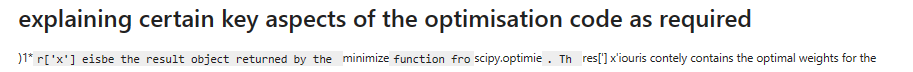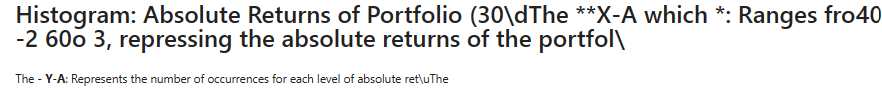

This is weird as the content I paste below with the true content was before I ran the code which ended up with the mess above. I hope this isnt the case with other users but ive made this section here just in case.

Here is what my markdown sections should look like: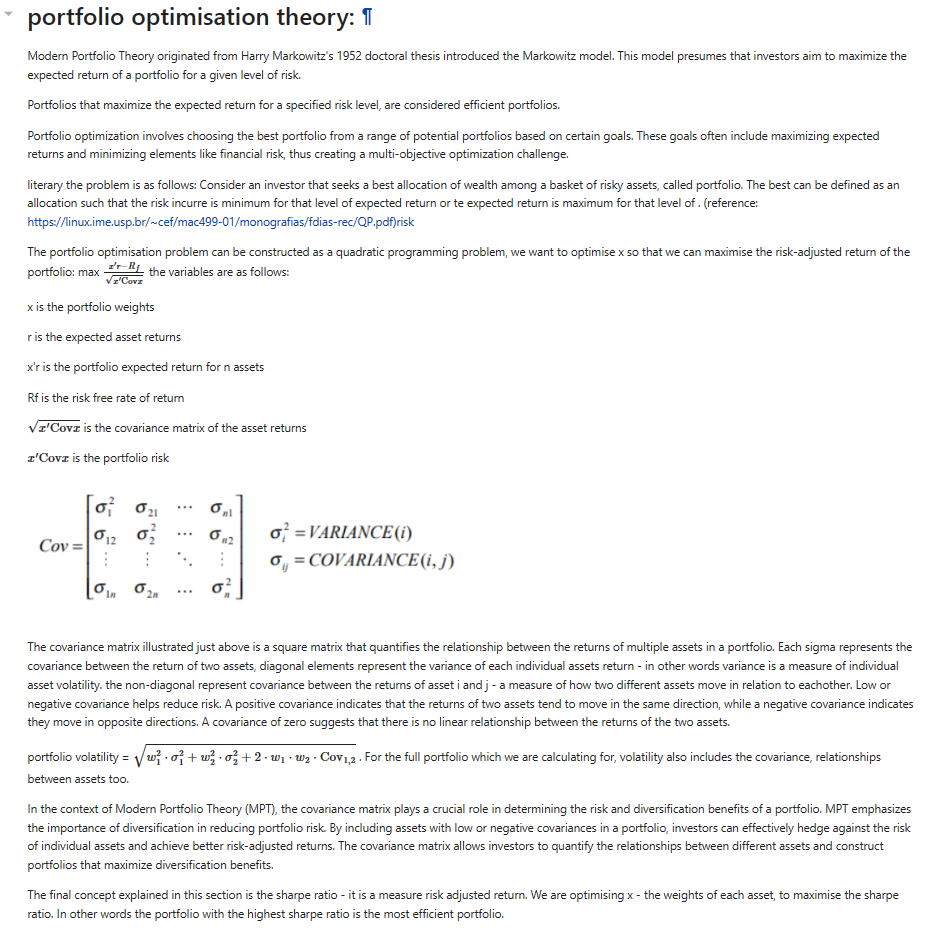
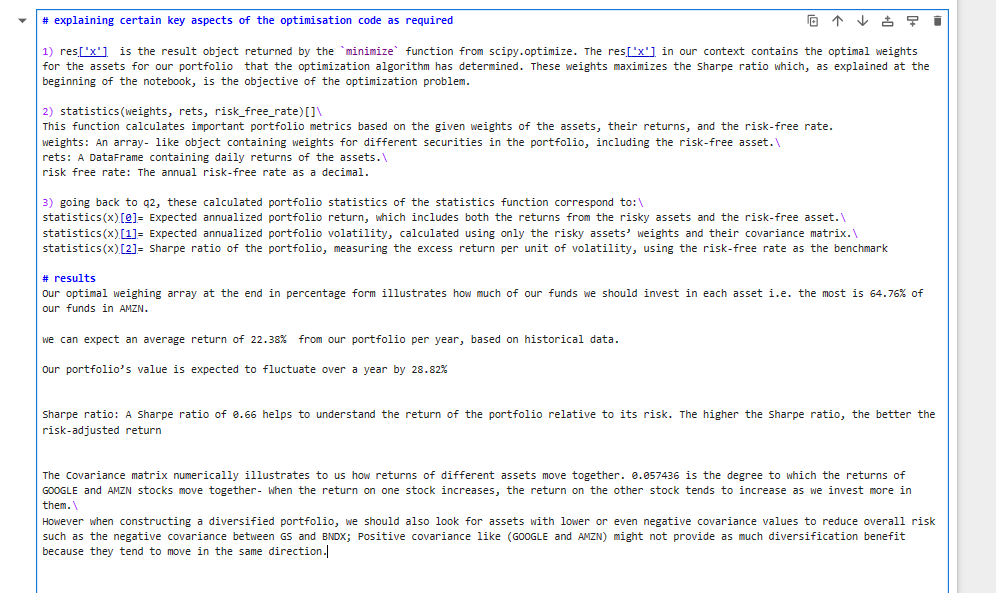
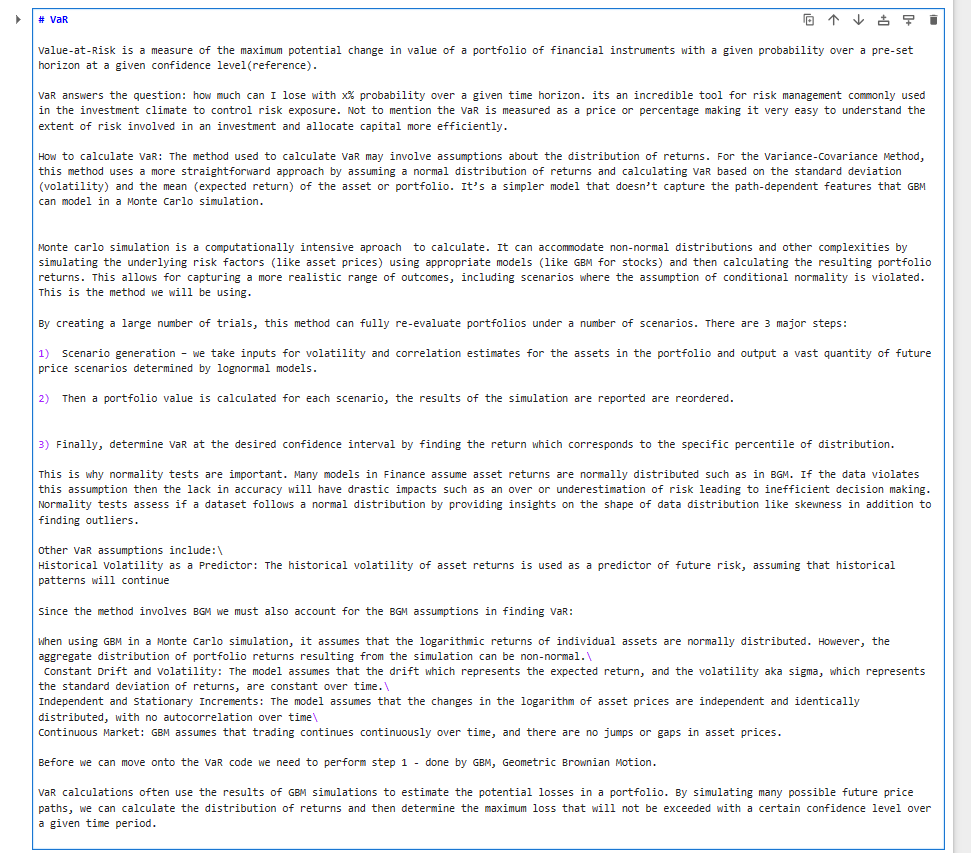
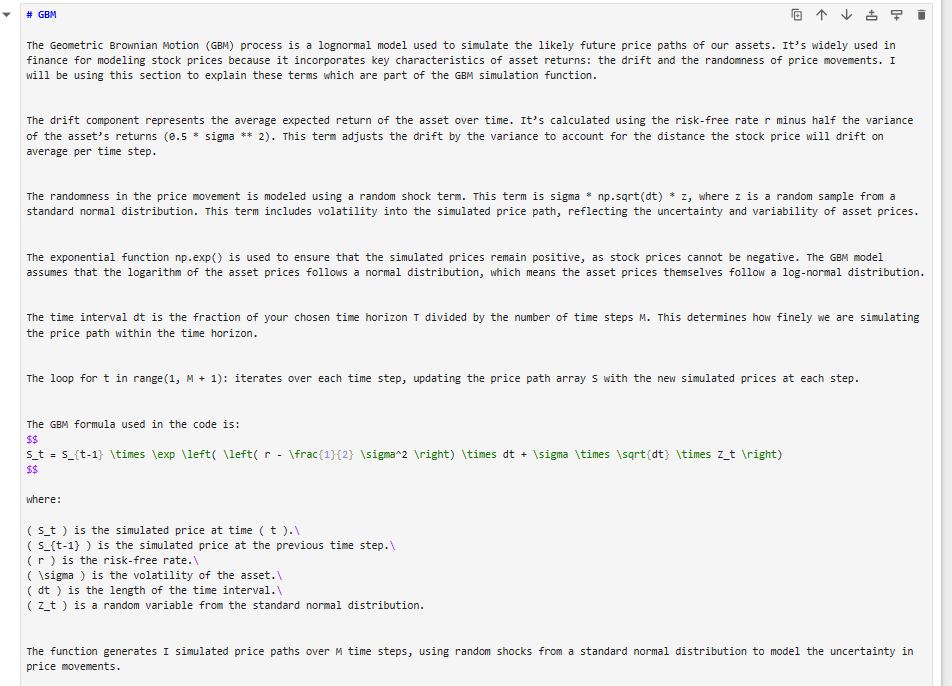
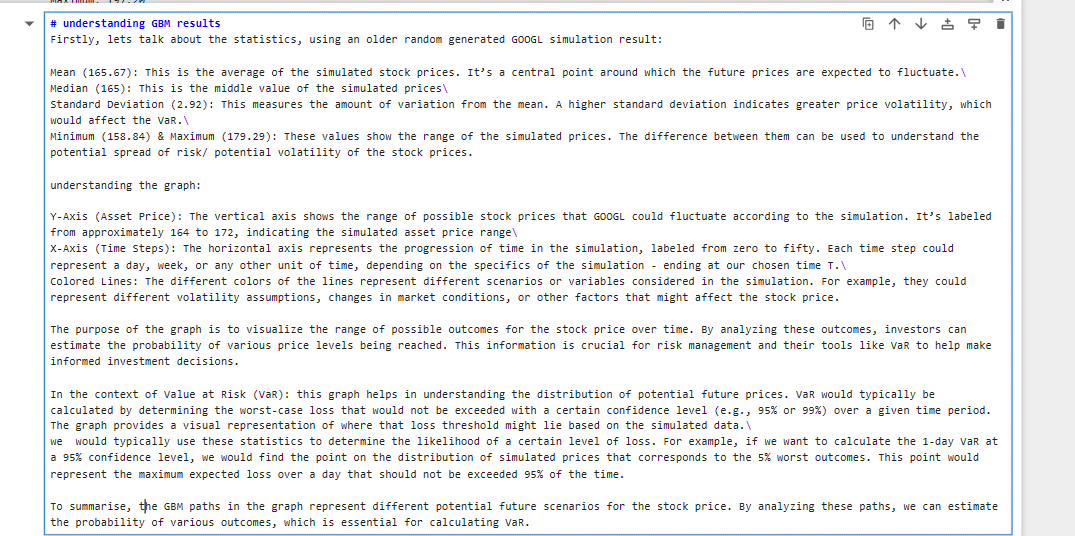
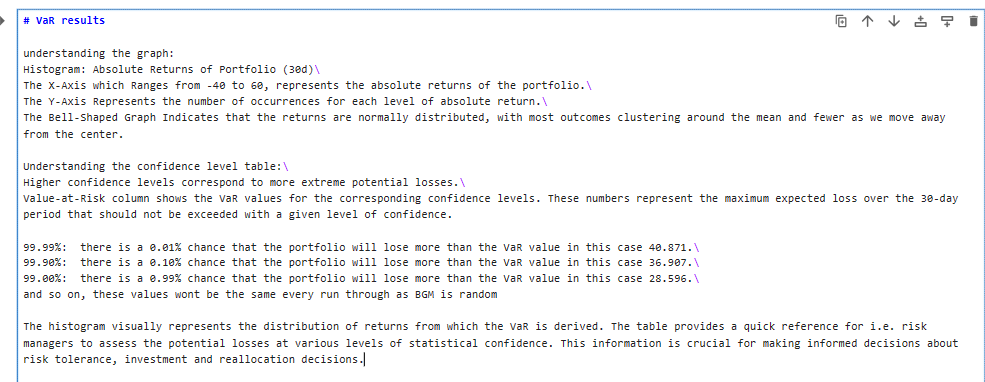
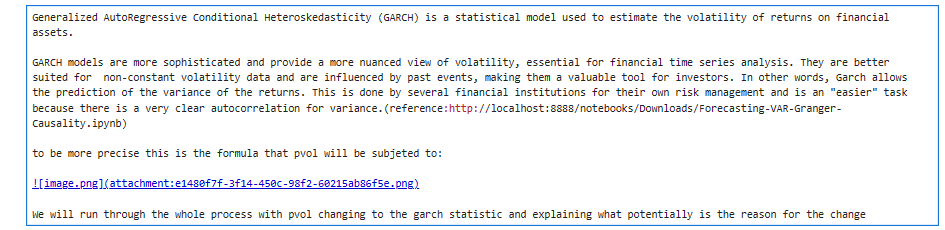
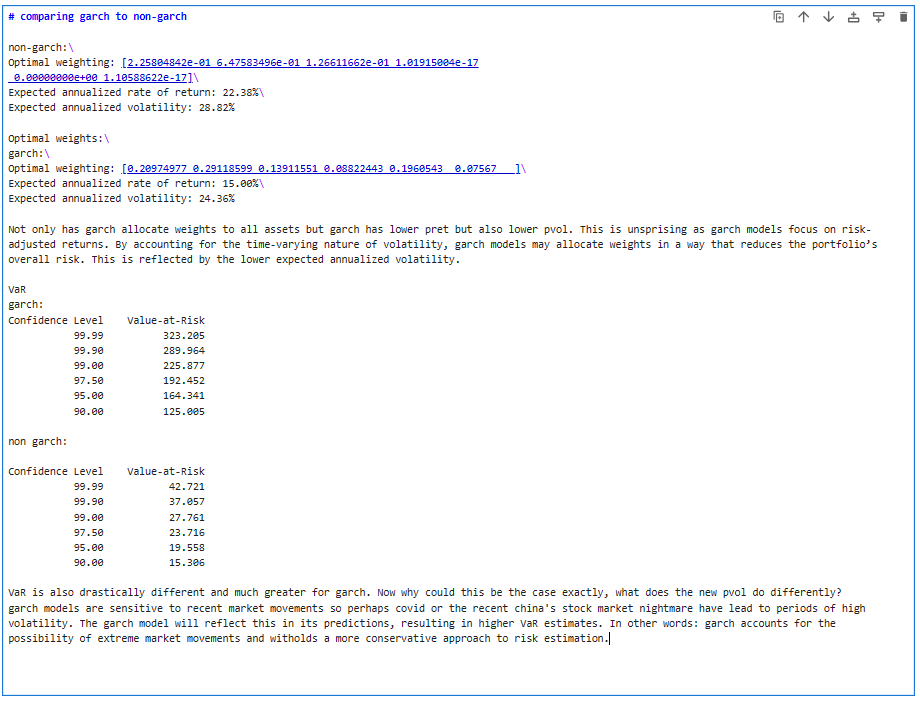
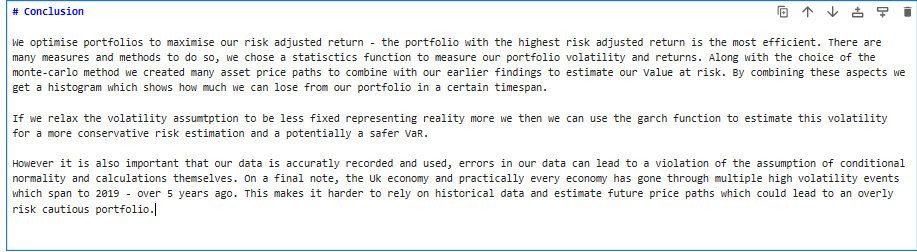

refrences

:https://linux.ime.usp.br/~cef/mac499-01/monografias/fdias-rec/QP.pdf)risk, markdown cell 1

https://www.bodleian.ox.ac.uk/sites/default/files/bodreader/documents/media/bloomberg-excel-add-in-guide.pdf markdown cell 2
